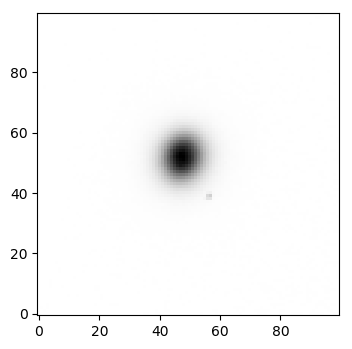

In [12]:
#Point Spread Function (PSF)
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.io import fits
%matplotlib inline

# Load the data and find center of PSF
filename = 'Mrk36'

image_full='/home/JackS/Documentos/python/galaxies/'+filename+'_full.fits'
image = fits.getdata(image_full)
image = image[36:136,894:994]
cents = np.where(image == np.max(image))
xc = int(cents[1])
yc = int(cents[0])

fig = plt.figure(dpi=100, edgecolor='white')
ax = fig.add_subplot(111)
plt.imshow(image, origin='lower', cmap='gray_r')


[[0.17672202 0.17744091 0.173361   ... 0.22292468 0.1953893  0.19824386]
 [0.15686171 0.17248452 0.15646042 ... 0.18484648 0.19422281 0.19759794]
 [0.2083057  0.19619294 0.16690788 ... 0.20696817 0.20024817 0.18997523]
 ...
 [0.16691475 0.16843393 0.21124882 ... 0.18435484 0.17452247 0.16964614]
 [0.13718897 0.14148298 0.1606965  ... 0.1820847  0.19133338 0.18474694]
 [0.15833496 0.14583215 0.12939592 ... 0.16573922 0.15806219 0.15392177]]
80 80


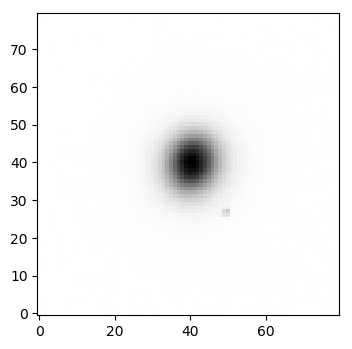

In [13]:
# Cut out smaller box around PSF
bb = 40 #range 
box = image[yc-bb:yc+bb,xc-bb:xc+bb]
print(box)

fig = plt.figure(dpi=100, edgecolor='white')
ax = fig.add_subplot(111)
plt.imshow(box, origin='lower', cmap='gray_r')
yp, xp = box.shape
print(yp,xp)

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...      y_stddev          theta      
    ------------------ ----------------- ... ----------------- ----------------
    21.660482089048678 40.63907918727767 ... 5.413430049428579 15.4368159091116


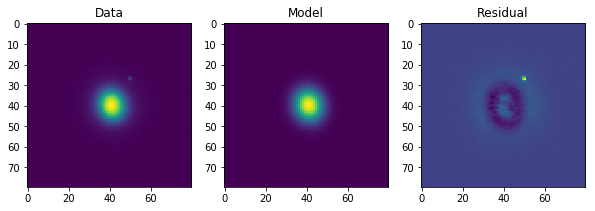

In [14]:
# Generate grid of same size like box to put the fit on
y, x, = np.mgrid[:yp, :xp]  #grid
# Declare what function you want to fit to your data
f_init = models.Gaussian2D()
# Declare what fitting function you want to use
fit_f = fitting.LevMarLSQFitter()

# Fit the model to your data (box)
f = fit_f(f_init, x, y, box)
print(f)
# Plot the data with the best-fit model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(box)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(f(x, y))
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(box - f(x, y))
plt.title("Residual")
plt.show()